In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

In [ ]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

In [ ]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

In [4]:
import os
import pandas as pd

In [3]:
import os
import pandas as pd

# Specify the folder containing the CSV files
folder_path = '../cleaned_product_wise_data/Oil/'

# List to hold DataFrames
df_list = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)       
        
        df = pd.read_csv(file_path, parse_dates=[0])
        df.set_index(df.columns[0], inplace=True)
        df.index.name = 'date'
        df['product_group'][0]
        


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path/to/your/folder'

In [10]:

df = pd.read_csv('../cleaned_product_wise_data/Oil/Coconut  Oil (Imported) - Superior Quality.csv', parse_dates=[0])
df.set_index(df.columns[0], inplace=True)
df.index.name = 'date'
df['product_group'][0]

C:\Users\user\AppData\Local\Temp\ipykernel_10928\1964083436.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['product_group'][0]


'Oil'

In [ ]:
merged_df = pd.concat(df_list).groupby('date').mean().reset_index()

In [54]:
import os
import pandas as pd


def merge_category(product_name):
    
    # Specify the folder containing the CSV files
    folder_path = f'../cleaned_product_wise_data/{product_name}/'
    

    # Initialize an empty DataFrame to hold the merged data
    merged_df = pd.DataFrame()

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file and parse the date column
            df = pd.read_csv(file_path, parse_dates=[0])
            
            # Set the first column as index and rename it to 'date'
            df.set_index(df.columns[0], inplace=True)
            df.index.name = 'date'
            
        
            
            # Rename columns to be unique for each file
            product_group_name = os.path.splitext(filename)[0]  # Get filename without extension
            df.columns = ['product_group', 'product_name_desc', 'unit_retail', 'min_retail_price', 
                        'max_retail_price', f'{product_group_name}_avg_retail_price', 'unit_wholesale', 
                        'min_wholesale_price', 'max_wholesale_price', f'{product_group_name}_avg_wholesale_price']
            
            # Select only the required columns
            df = df[[f'{product_group_name}_avg_retail_price', f'{product_group_name}_avg_wholesale_price']]
           
            #rename column names to lowercase
            df.columns = map(str.lower, df.columns)
        
            # Merge with the main DataFrame
            if merged_df.empty:
                merged_df = df
            else:
                merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how='outer')


            merged_df.to_csv(f'../merged_category_wise_data/{product_name}.csv')

In [55]:
for foldername in os.listdir('../cleaned_product_wise_data/'):
    merge_category(product_name=foldername)

In [46]:
merged_df.columns

Index(['butter oil_avg_retail_price', 'butter oil_avg_wholesale_price',
       'coconut  oil (imported) - superior quality_avg_retail_price',
       'coconut  oil (imported) - superior quality_avg_wholesale_price',
       'coconut oil (imported) - ordinary_avg_retail_price',
       'coconut oil (imported) - ordinary_avg_wholesale_price',
       'coconut oil (local)_avg_retail_price',
       'coconut oil (local)_avg_wholesale_price',
       'ground nut oil_avg_retail_price', 'ground nut oil_avg_wholesale_price',
       'mustard oil (imported)_avg_retail_price',
       'mustard oil (imported)_avg_wholesale_price',
       'mustard oil (local) - ordinary_avg_retail_price',
       'mustard oil (local) - ordinary_avg_wholesale_price',
       'mustard oil (local) - superior quality_avg_retail_price',
       'mustard oil (local) - superior quality_avg_wholesale_price',
       'palm oil_avg_retail_price', 'palm oil_avg_wholesale_price',
       'sesame oil(till)_avg_retail_price',
       'sesame

In [52]:
merged_df

,butter oil_avg_retail_price,butter oil_avg_wholesale_price,coconut oil (imported) - superior quality_avg_retail_price,coconut oil (imported) - superior quality_avg_wholesale_price,coconut oil (imported) - ordinary_avg_retail_price,coconut oil (imported) - ordinary_avg_wholesale_price,coconut oil (local)_avg_retail_price,coconut oil (local)_avg_wholesale_price,ground nut oil_avg_retail_price,ground nut oil_avg_wholesale_price,...,soyabin oil (1 lit bottle)_avg_retail_price,soyabin oil (1 lit bottle)_avg_wholesale_price,soyabin oil (5 liter bottle)_avg_retail_price,soyabin oil (5 liter bottle)_avg_wholesale_price,soybean oil(loose)_avg_retail_price,soybean oil(loose)_avg_wholesale_price,sunflower_avg_retail_price,sunflower_avg_wholesale_price,vegetable ghee_avg_retail_price,vegetable ghee_avg_wholesale_price
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,115.0,10518.0,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,193.5,19588.0,176.5,14257.0,210.5,18706.0,NaN,20000.0,...,NaN,NaN,NaN,NaN,117.0,11219.0,NaN,NaN,111.0,10286.0
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116.0,10518.0,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,NaN,NaN,NaN,NaN,405.0,37667.0,265.0,26000.0,NaN,NaN,...,167.0,16363.0,809.5,16150.0,151.5,14721.0,NaN,NaN,164.5,15900.0
2024-06-24,NaN,NaN,NaN,NaN,405.0,37667.0,265.0,26000.0,NaN,NaN,...,166.0,16357.0,809.5,16150.0,151.5,14705.0,NaN,NaN,164.5,15900.0
2024-06-25,NaN,NaN,NaN,NaN,405.0,37667.0,265.0,26000.0,NaN,NaN,...,167.0,16363.0,809.5,16150.0,152.0,14733.0,NaN,NaN,164.5,15900.0


In [49]:
import missingno as msno

In [48]:
merged_df.isnull().sum()

butter oil_avg_retail_price                                       2999
butter oil_avg_wholesale_price                                    4121
coconut  oil (imported) - superior quality_avg_retail_price       2327
coconut  oil (imported) - superior quality_avg_wholesale_price    2320
coconut oil (imported) - ordinary_avg_retail_price                2158
coconut oil (imported) - ordinary_avg_wholesale_price             2265
coconut oil (local)_avg_retail_price                              1924
coconut oil (local)_avg_wholesale_price                           1946
ground nut oil_avg_retail_price                                   4061
ground nut oil_avg_wholesale_price                                4064
mustard oil (imported)_avg_retail_price                           3648
mustard oil (imported)_avg_wholesale_price                        3710
mustard oil (local) - ordinary_avg_retail_price                   1756
mustard oil (local) - ordinary_avg_wholesale_price                1775
mustar

<Axes: >

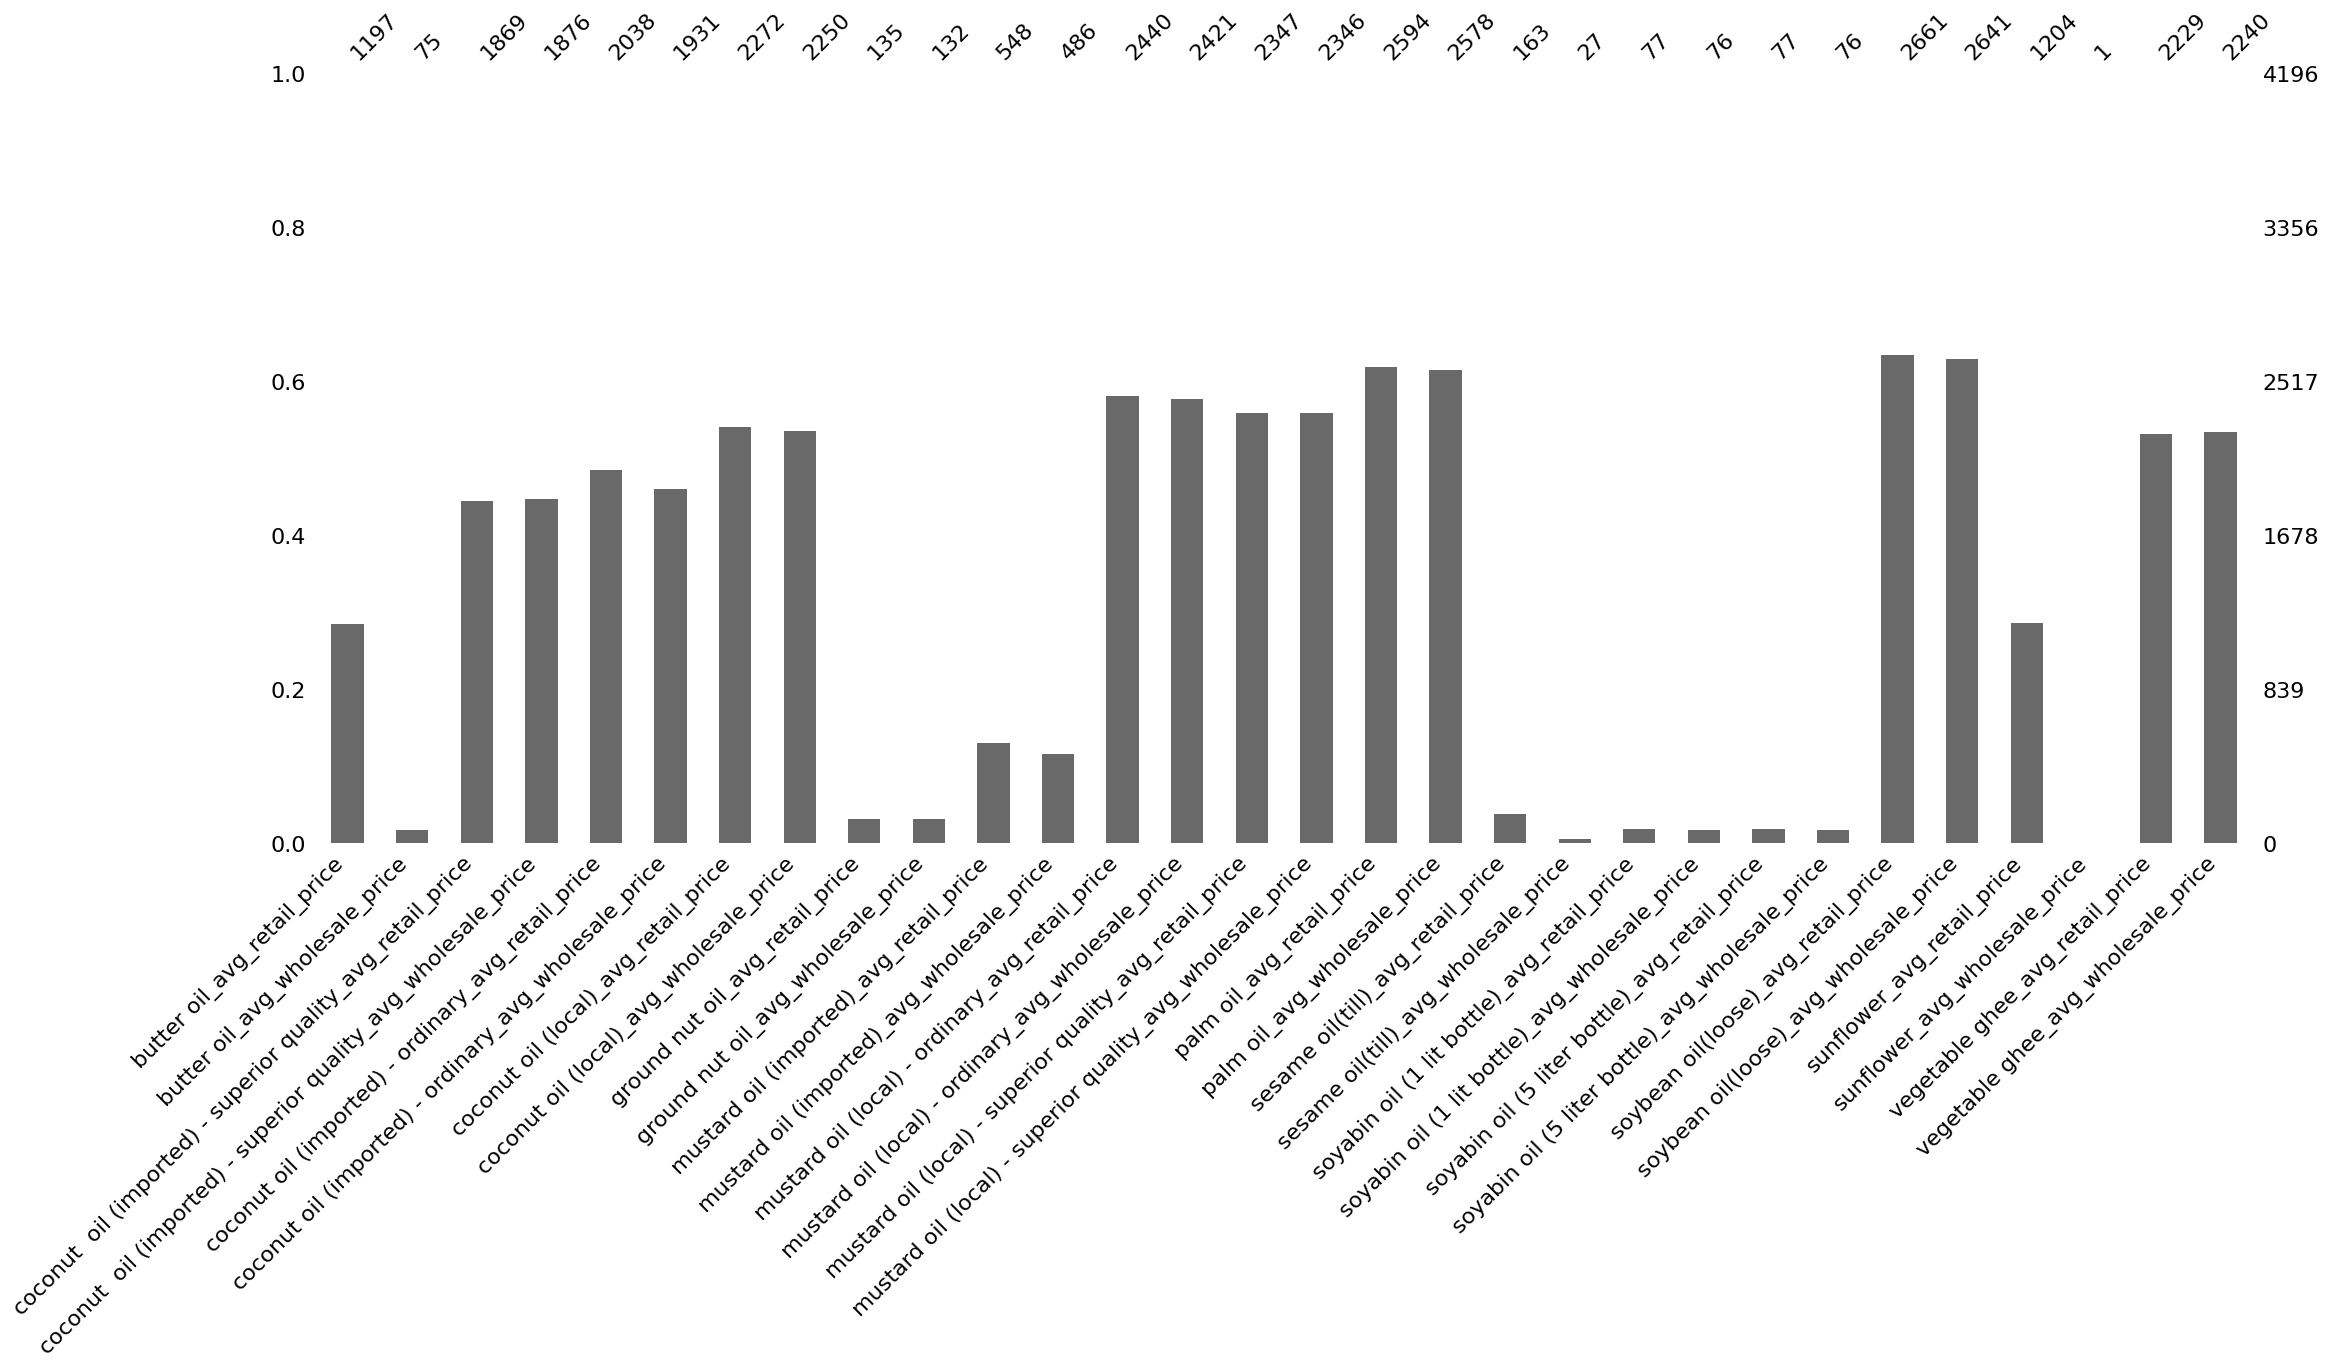

In [50]:
msno.bar(merged_df)

<Axes: >

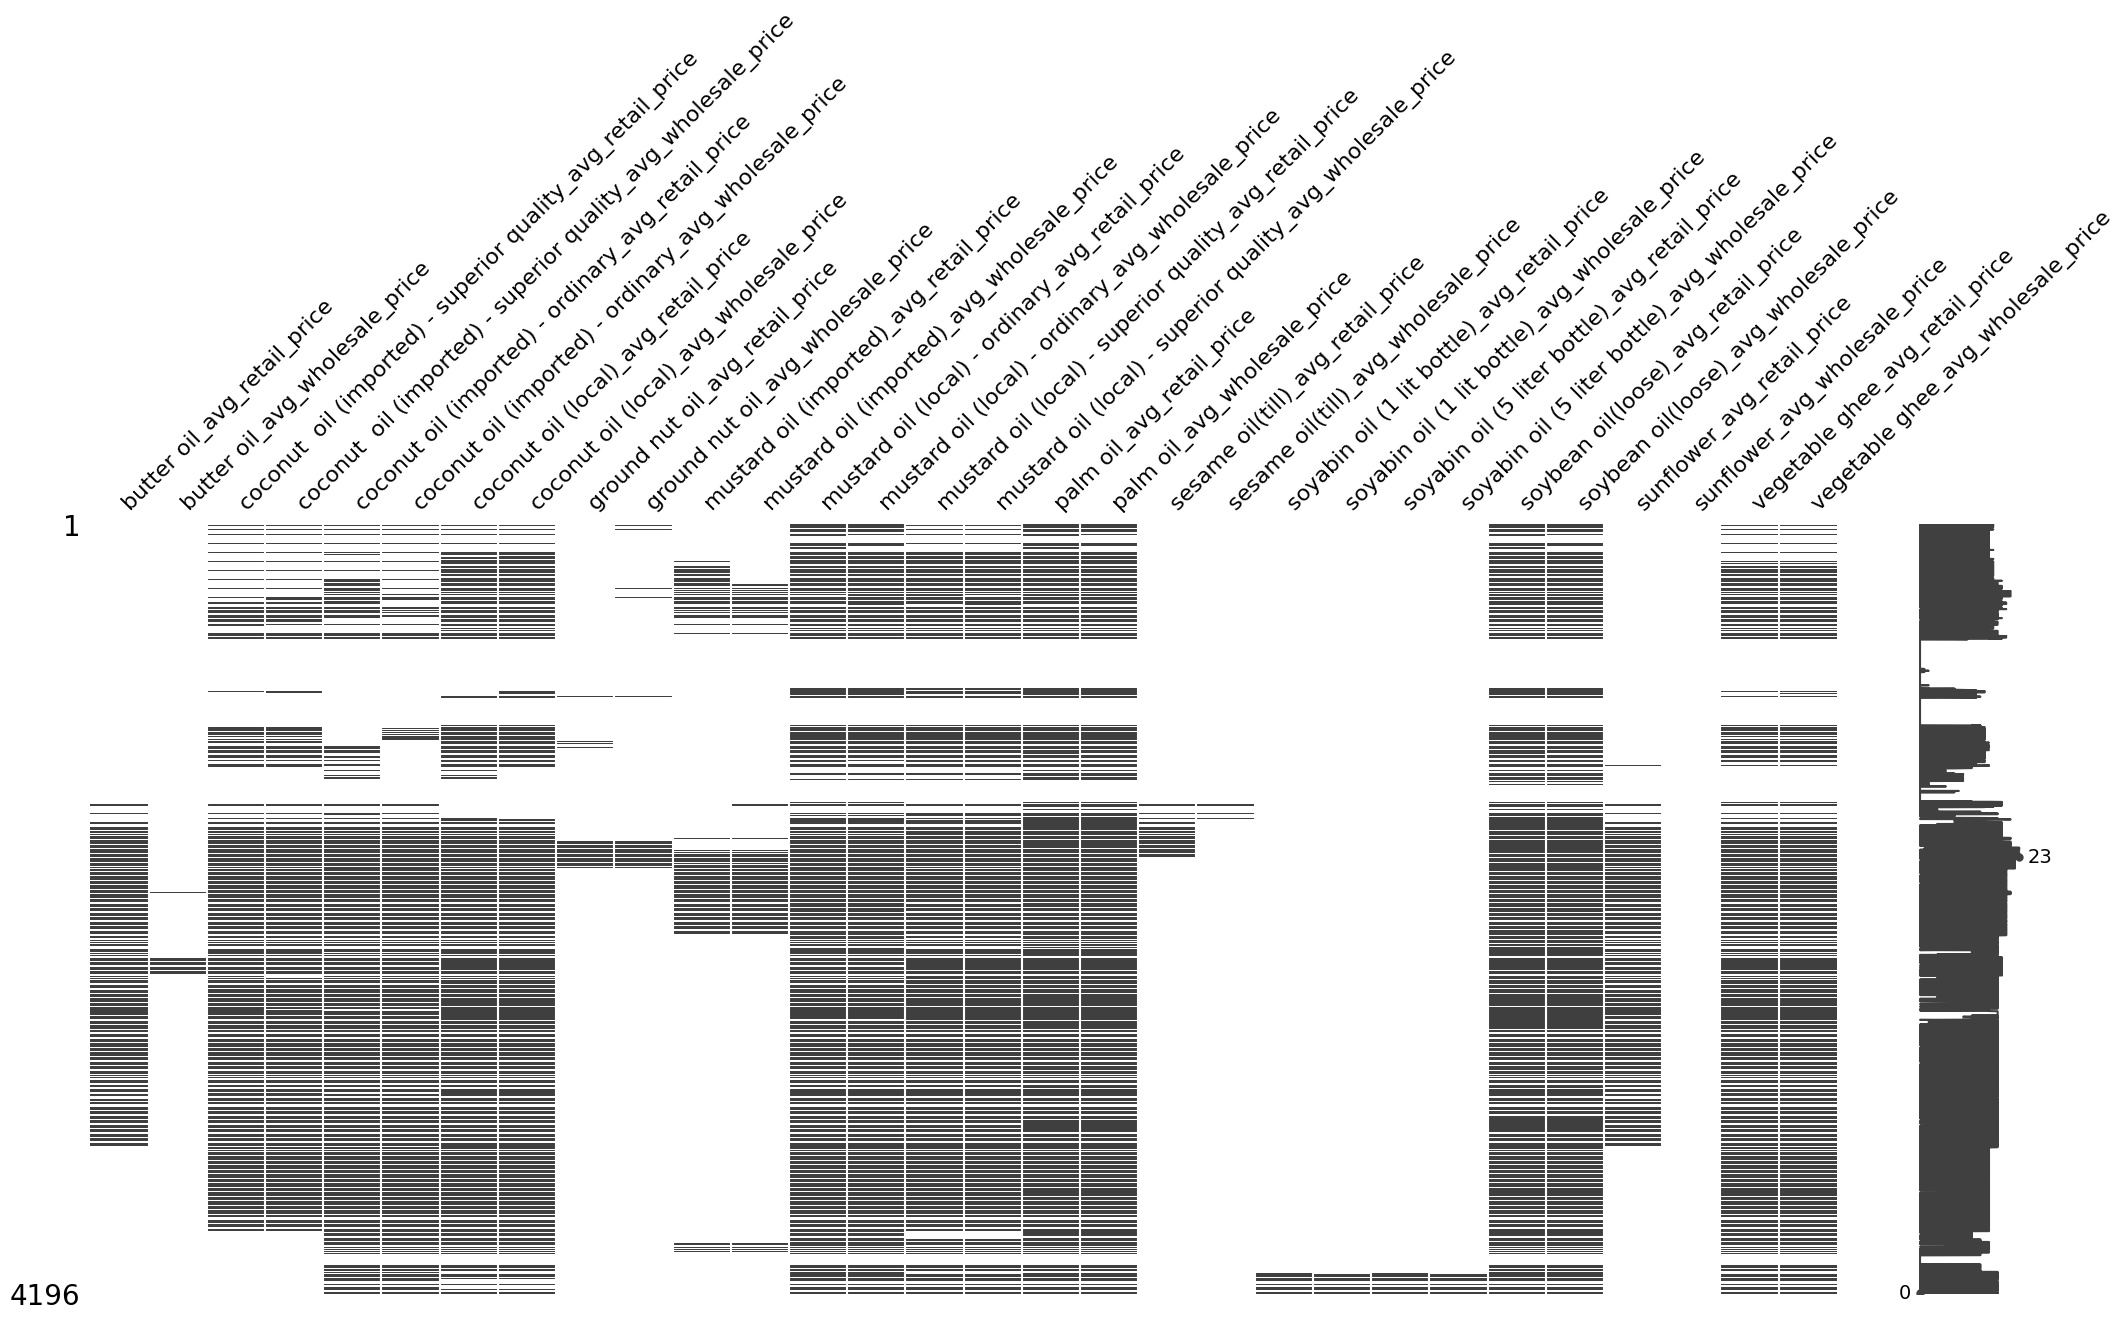

In [51]:
msno.matrix(merged_df)